In [1]:
import os
print(os.getcwd())
os.chdir('/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1')
print(os.getcwd())

/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1/tests
/Users/boyuren/Documents/multi_head_graph_rag/MH-GRAG-V1


# Document -> Chunk

In [2]:
from src.extractors.chunk_extractor import split_text_into_chunks


with open('data/novel.txt', 'r', encoding='utf-8') as file:
    source_document = file.read()
chunk_size = 600  # 可根据需要调整大小
chunks = split_text_into_chunks(source_document, chunk_size)

for idx, chunk in enumerate(chunks[:5]):
    print(f"Chunk {idx + 1}:\n{chunk}\n")

Chunk 1:
Chunk(id=0, content=[1]一 醇贤亲王的一生 ——公元一九○...)

Chunk 2:
Chunk(id=1, content=万两银子重加修缮。这是第二座醇王府，也就...)

Chunk 3:
Chunk(id=2, content=戏，演到“铡美案”最后一场，年幼的六叔载...)

Chunk 4:
Chunk(id=3, content=满族人民实行的统治制度是军事、行政、生产...)

Chunk 5:
Chunk(id=4, content=后来当了皇帝，母以子贵，她立时成了太后。...)



# Chunk -> Entity & Relationship

In [3]:
from src.extractors.relationship_extractor import extract_entities_and_relationships

# 获取第一个分片，测试获取实体与关系的效果
chunk = chunks[0]

# 提取实体和关系，返回两个 DataFrame
df_entities, df_relationships = extract_entities_and_relationships(chunk)

# 输出实体和关系的 DataFrame
df_entities

,entity_name,entity_type,description,entity_id
0,醇贤亲王,Person,清朝光绪三十二年的旧历正月十四出生于北京的醇王府的第一代醇王,8cadf343-b64f-4eff-9b75-15d7b963031f
1,醇王府,Location,曾占据过三处地方，分别位于宣武门内的太平湖东岸、什刹后海、北京,f01a5b35-bfdb-4720-b714-ca92e8e6de18
2,慈禧太后,Person,醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，清朝的第十代皇帝宣统的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af
3,光绪皇帝,Person,醇贤亲王奕讠瞏的儿子，慈禧太后的亲生子，清朝的第十代皇帝宣统的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7
4,宣统皇帝,Person,清朝的第十代，也是最末一代的皇帝，年号宣统，在三岁那年的旧历十月二十日被慈禧太后和光绪皇帝立...,4715b786-8a65-4f72-9135-fb41124c2922


In [4]:
df_relationships

,source_entity,target_entity,relationship_type,relationship_description,source_entity_id,target_entity_id
0,醇贤亲王,醇王府,Located-in,醇贤亲王的王府位于醇王府,8cadf343-b64f-4eff-9b75-15d7b963031f,f01a5b35-bfdb-4720-b714-ca92e8e6de18
1,慈禧太后,光绪皇帝,Family-Relation,慈禧太后是光绪皇帝的姨母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,b806f3ab-849b-489c-a022-bfd23ed0a5c7
2,光绪皇帝,宣统皇帝,Family-Relation,光绪皇帝是宣统皇帝的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,4715b786-8a65-4f72-9135-fb41124c2922
3,慈禧太后,宣统皇帝,Affiliated-with,慈禧太后是宣统皇帝的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,4715b786-8a65-4f72-9135-fb41124c2922
4,宣统皇帝,醇王府,Located-in,宣统皇帝的王府位于醇王府,4715b786-8a65-4f72-9135-fb41124c2922,f01a5b35-bfdb-4720-b714-ca92e8e6de18


# Entity & Relationship -> Summary

In [6]:
import pandas as pd
from src.extractors.summarize_extractor import summarize_element_instances

df_entities, df_relationships = summarize_element_instances(df_entities, df_relationships)
df_entities

Processing Relationships: 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


,entity_name,entity_type,description,entity_id,summary
0,醇贤亲王,Person,清朝光绪三十二年的旧历正月十四出生于北京的醇王府的第一代醇王,8cadf343-b64f-4eff-9b75-15d7b963031f,The first-generation Prince Chun of the Qing D...
1,醇王府,Location,曾占据过三处地方，分别位于宣武门内的太平湖东岸、什刹后海、北京,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇王府位于北京。
2,慈禧太后,Person,醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，清朝的第十代皇帝宣统的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,慈禧太后是醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，也是清朝的第十代皇帝宣统的养母。
3,光绪皇帝,Person,醇贤亲王奕讠瞏的儿子，慈禧太后的亲生子，清朝的第十代皇帝宣统的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,光绪皇帝是慈禧太后的亲生子，醇贤亲王奕讠瞏的儿子，宣统的堂兄弟。
4,宣统皇帝,Person,清朝的第十代，也是最末一代的皇帝，年号宣统，在三岁那年的旧历十月二十日被慈禧太后和光绪皇帝立...,4715b786-8a65-4f72-9135-fb41124c2922,宣统皇帝是清朝的最后一位皇帝。


In [7]:
df_relationships

,source_entity,target_entity,relationship_type,relationship_description,source_entity_id,target_entity_id,summary
0,醇贤亲王,醇王府,Located-in,醇贤亲王的王府位于醇王府,8cadf343-b64f-4eff-9b75-15d7b963031f,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇贤亲王的王府就是醇王府。
1,慈禧太后,光绪皇帝,Family-Relation,慈禧太后是光绪皇帝的姨母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,b806f3ab-849b-489c-a022-bfd23ed0a5c7,慈禧太后是光绪皇帝的姨母兼伯母。
2,光绪皇帝,宣统皇帝,Family-Relation,光绪皇帝是宣统皇帝的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,4715b786-8a65-4f72-9135-fb41124c2922,光绪皇帝是宣统皇帝的叔叔。
3,慈禧太后,宣统皇帝,Affiliated-with,慈禧太后是宣统皇帝的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,4715b786-8a65-4f72-9135-fb41124c2922,慈禧太后是宣统皇帝的养母。
4,宣统皇帝,醇王府,Located-in,宣统皇帝的王府位于醇王府,4715b786-8a65-4f72-9135-fb41124c2922,f01a5b35-bfdb-4720-b714-ca92e8e6de18,宣统皇帝溥仪的王府位于醇王府。


In [3]:
# df_entities.to_csv("export/df_entities.csv",index=False)
# df_relationships.to_csv("export/df_relationships.csv",index=False)
import pandas as pd
df_entities=pd.read_csv("export/df_entities.csv")
df_relationships=pd.read_csv("export/df_relationships.csv")
df_relationships

,source_entity,target_entity,relationship_type,relationship_description,source_entity_id,target_entity_id,summary
0,醇贤亲王,醇王府,Located-in,醇贤亲王的王府位于醇王府,8cadf343-b64f-4eff-9b75-15d7b963031f,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇贤亲王的王府就是醇王府。
1,慈禧太后,光绪皇帝,Family-Relation,慈禧太后是光绪皇帝的姨母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,b806f3ab-849b-489c-a022-bfd23ed0a5c7,慈禧太后是光绪皇帝的姨母兼伯母。
2,光绪皇帝,宣统皇帝,Family-Relation,光绪皇帝是宣统皇帝的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,4715b786-8a65-4f72-9135-fb41124c2922,光绪皇帝是宣统皇帝的叔叔。
3,慈禧太后,宣统皇帝,Affiliated-with,慈禧太后是宣统皇帝的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,4715b786-8a65-4f72-9135-fb41124c2922,慈禧太后是宣统皇帝的养母。
4,宣统皇帝,醇王府,Located-in,宣统皇帝的王府位于醇王府,4715b786-8a65-4f72-9135-fb41124c2922,f01a5b35-bfdb-4720-b714-ca92e8e6de18,宣统皇帝溥仪的王府位于醇王府。


# Summary -> Embedding

In [5]:
from src.extractors.embedding_extractor import generate_and_save_embeddings
from src.utils.config import OUTPUT_PATH

df_entities,df_relationships=generate_and_save_embeddings(df_entities,df_relationships,OUTPUT_PATH)
df_entities

Generating embeddings for entities...


Generating embeddings for description: 100%|██████████| 5/5 [00:00<00:00,  5.71it/s]


Generating embeddings for relationships...


Generating relationship embeddings: 100%|██████████| 5/5 [00:00<00:00, 21.04it/s]

File successfully saved in export/entities_cvzuqofd.csv.
File successfully saved in export/relationships_vbcqapsx.csv.
Entities embedding saved to export/entities_cvzuqofd.csv
Relationships embedding saved to export/relationships_vbcqapsx.csv


,entity_name,entity_type,description,entity_id,summary,entity_embedding
0,醇贤亲王,Person,清朝光绪三十二年的旧历正月十四出生于北京的醇王府的第一代醇王,8cadf343-b64f-4eff-9b75-15d7b963031f,The first-generation Prince Chun of the Qing D...,"[0.029964685440063477, 0.00672378484159708, -0..."
1,醇王府,Location,曾占据过三处地方，分别位于宣武门内的太平湖东岸、什刹后海、北京,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇王府位于北京。,"[0.04614634066820145, 0.00939241610467434, -0...."
2,慈禧太后,Person,醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，清朝的第十代皇帝宣统的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,慈禧太后是醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，也是清朝的第十代皇帝宣统的养母。,"[0.02171177789568901, -0.0008067012531682849, ..."
3,光绪皇帝,Person,醇贤亲王奕讠瞏的儿子，慈禧太后的亲生子，清朝的第十代皇帝宣统的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,光绪皇帝是慈禧太后的亲生子，醇贤亲王奕讠瞏的儿子，宣统的堂兄弟。,"[0.031078608706593513, -0.002139266114681959, ..."
4,宣统皇帝,Person,清朝的第十代，也是最末一代的皇帝，年号宣统，在三岁那年的旧历十月二十日被慈禧太后和光绪皇帝立...,4715b786-8a65-4f72-9135-fb41124c2922,宣统皇帝是清朝的最后一位皇帝。,"[0.04003078490495682, 0.0005542877479456365, -..."


In [6]:
df_relationships

,source_entity,target_entity,relationship_type,relationship_description,source_entity_id,target_entity_id,summary,relationship_embedding
0,醇贤亲王,醇王府,Located-in,醇贤亲王的王府位于醇王府,8cadf343-b64f-4eff-9b75-15d7b963031f,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇贤亲王的王府就是醇王府。,"[0.035192880779504776, -0.013009426183998585, ..."
1,慈禧太后,光绪皇帝,Family-Relation,慈禧太后是光绪皇帝的姨母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,b806f3ab-849b-489c-a022-bfd23ed0a5c7,慈禧太后是光绪皇帝的姨母兼伯母。,"[0.016096526756882668, -0.0004098402860108763,..."
2,光绪皇帝,宣统皇帝,Family-Relation,光绪皇帝是宣统皇帝的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,4715b786-8a65-4f72-9135-fb41124c2922,光绪皇帝是宣统皇帝的叔叔。,"[0.01749114878475666, -0.0008124065352603793, ..."
3,慈禧太后,宣统皇帝,Affiliated-with,慈禧太后是宣统皇帝的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,4715b786-8a65-4f72-9135-fb41124c2922,慈禧太后是宣统皇帝的养母。,"[0.029399877414107323, -0.0040983050130307674,..."
4,宣统皇帝,醇王府,Located-in,宣统皇帝的王府位于醇王府,4715b786-8a65-4f72-9135-fb41124c2922,f01a5b35-bfdb-4720-b714-ca92e8e6de18,宣统皇帝溥仪的王府位于醇王府。,"[0.04441821202635765, -0.015022743493318558, -..."


# Embedding -> Graph database (Community)

Clustering sub-communities: 100%|██████████| 2/2 [00:00<00:00, 3578.76it/s]


Computing transition probabilities:   0%|          | 0/5 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISMTo disable this warning, you can either:
=(true | false)
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISMhuggingface/tokenizers: The current process 

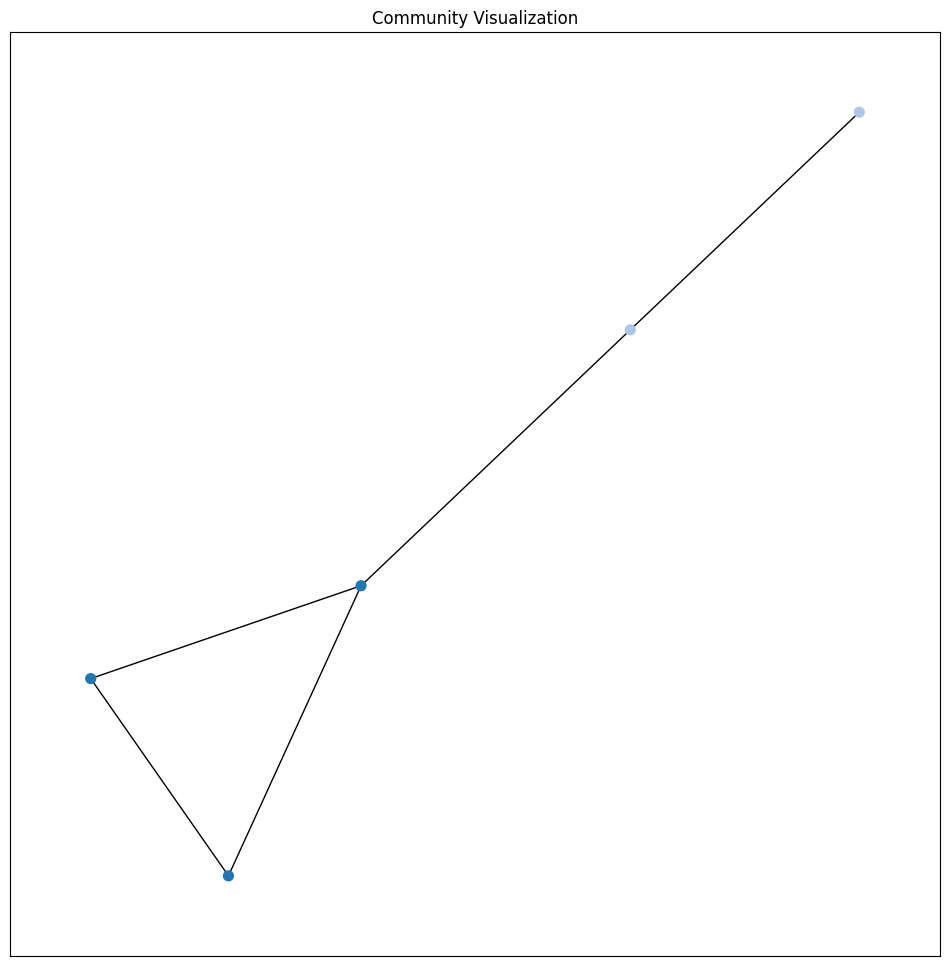

In [7]:
from src.extractors.graph_extractor import GraphExtractor
import pandas as pd

# 初始化 GraphExtractor
graph_extractor = GraphExtractor()

# 生成图并执行社区检测
G = graph_extractor.build_graph(df_entities, df_relationships)
community_mapping, sub_community_mapping = graph_extractor.perform_community_detection()

# 生成 Node2Vec 嵌入
node2vec_embeddings = graph_extractor.generate_node2vec_embeddings()

# 将社区信息和 Node2Vec 嵌入添加到 DataFrame
df_entities_with_embeddings = graph_extractor.add_embeddings_to_dataframe(df_entities, community_mapping, sub_community_mapping, node2vec_embeddings)

# 可视化社区
graph_extractor.visualize_communities()


In [8]:
df_entities_with_embeddings

,entity_name,entity_type,description,entity_id,summary,entity_embedding,community_id,sub_community_id,node2vec_embedding
0,醇贤亲王,Person,清朝光绪三十二年的旧历正月十四出生于北京的醇王府的第一代醇王,8cadf343-b64f-4eff-9b75-15d7b963031f,The first-generation Prince Chun of the Qing D...,"[0.029964685440063477, 0.00672378484159708, -0...",1,0,"[-0.123341225, -0.10402123, 0.066473864, -0.06..."
1,醇王府,Location,曾占据过三处地方，分别位于宣武门内的太平湖东岸、什刹后海、北京,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇王府位于北京。,"[0.04614634066820145, 0.00939241610467434, -0....",1,0,"[-0.10139733, -0.05140805, 0.11818517, -0.0565..."
2,慈禧太后,Person,醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，清朝的第十代皇帝宣统的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,慈禧太后是醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，也是清朝的第十代皇帝宣统的养母。,"[0.02171177789568901, -0.0008067012531682849, ...",0,0,"[-0.04795455, -0.04256403, 0.111331955, 0.0442..."
3,光绪皇帝,Person,醇贤亲王奕讠瞏的儿子，慈禧太后的亲生子，清朝的第十代皇帝宣统的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,光绪皇帝是慈禧太后的亲生子，醇贤亲王奕讠瞏的儿子，宣统的堂兄弟。,"[0.031078608706593513, -0.002139266114681959, ...",0,0,"[-0.05405466, -0.04698906, 0.08429745, 0.01785..."
4,宣统皇帝,Person,清朝的第十代，也是最末一代的皇帝，年号宣统，在三岁那年的旧历十月二十日被慈禧太后和光绪皇帝立...,4715b786-8a65-4f72-9135-fb41124c2922,宣统皇帝是清朝的最后一位皇帝。,"[0.04003078490495682, 0.0005542877479456365, -...",0,0,"[-0.06820322, -0.07349271, 0.072061345, 0.0267..."


In [11]:
from src.utils.embedding_utils import save_df_with_embedding_as_csv
from src.utils.config import OUTPUT_PATH

save_df_with_embedding_as_csv(df_entities_with_embeddings, ['entity_embedding','node2vec_embedding'], f"{OUTPUT_PATH}/entities_with_embedding_and_node2vec_embedding.csv")

File successfully saved in export/entities_with_embedding_and_node2vec_embedding.csv.


In [2]:
from src.utils.embedding_utils import load_df_from_csv_with_embedding
from src.utils.config import OUTPUT_PATH

df_entities_with_embeddings=load_df_from_csv_with_embedding(f"{OUTPUT_PATH}/entities_with_embedding_and_node2vec_embedding.csv",['entity_embedding','node2vec_embedding'])
df_entities_with_embeddings

,entity_name,entity_type,description,entity_id,summary,entity_embedding,community_id,sub_community_id,node2vec_embedding
0,醇贤亲王,Person,清朝光绪三十二年的旧历正月十四出生于北京的醇王府的第一代醇王,8cadf343-b64f-4eff-9b75-15d7b963031f,The first-generation Prince Chun of the Qing D...,"[0.029964685440063477, 0.00672378484159708, -0...",1,0,"[-0.12334122508764267, -0.10402122884988785, 0..."
1,醇王府,Location,曾占据过三处地方，分别位于宣武门内的太平湖东岸、什刹后海、北京,f01a5b35-bfdb-4720-b714-ca92e8e6de18,醇王府位于北京。,"[0.04614634066820145, 0.00939241610467434, -0....",1,0,"[-0.1013973280787468, -0.05140804871916771, 0...."
2,慈禧太后,Person,醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，清朝的第十代皇帝宣统的养母,94eaa95b-fc59-418a-bca5-ddbf953bf9af,慈禧太后是醇贤亲王奕讠瞏的儿媳妇，光绪皇帝的姨母，也是清朝的第十代皇帝宣统的养母。,"[0.02171177789568901, -0.0008067012531682849, ...",0,0,"[-0.04795454815030098, -0.0425640307366848, 0...."
3,光绪皇帝,Person,醇贤亲王奕讠瞏的儿子，慈禧太后的亲生子，清朝的第十代皇帝宣统的堂兄弟,b806f3ab-849b-489c-a022-bfd23ed0a5c7,光绪皇帝是慈禧太后的亲生子，醇贤亲王奕讠瞏的儿子，宣统的堂兄弟。,"[0.031078608706593513, -0.002139266114681959, ...",0,0,"[-0.054054658859968185, -0.04698906093835831, ..."
4,宣统皇帝,Person,清朝的第十代，也是最末一代的皇帝，年号宣统，在三岁那年的旧历十月二十日被慈禧太后和光绪皇帝立...,4715b786-8a65-4f72-9135-fb41124c2922,宣统皇帝是清朝的最后一位皇帝。,"[0.04003078490495682, 0.0005542877479456365, -...",0,0,"[-0.06820321828126907, -0.07349271327257156, 0..."


# Community -> Community Report & Sub Community Report

In [13]:
from src.report.community_report import generate_reports_for_all_communities

# 生成社区报告
community_reports_df = generate_reports_for_all_communities(df_entities_with_embeddings)

# 查看生成的社区报告
community_reports_df

,community_id,community_report
0,0,以下是生成的社区报告：\n- 慈禧太后：慈禧太后是清朝晚期的重要政治人物，也是中国历史上的一...
1,1,好的，以下是根据你提供的信息生成的社区报告：\n\n# 醇贤亲王载沣与醇王府\n\n## 一...


In [5]:
from src.extractors.embedding_extractor import generate_community_report_embeddings
from src.utils.config import OUTPUT_PATH

community_reports_df=generate_community_report_embeddings(community_reports_df,OUTPUT_PATH)
community_reports_df

Generating embeddings for community reports...


Generating embeddings for community_report: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

File successfully saved in export/community_report_ecprzbmu.csv.
community_report_with_embedding saved to export/community_report_ecprzbmu.csv


,community_id,community_report,community_report_embedding
0,0,以下是生成的社区报告：\n- 慈禧太后：慈禧太后是清朝晚期的重要政治人物，也是中国历史上的一...,"[0.04285317659378052, -0.008042436093091965, -..."
1,1,好的，以下是根据你提供的信息生成的社区报告：\n\n# 醇贤亲王载沣与醇王府\n\n## 一...,"[0.0195251926779747, -0.008907507173717022, -0..."


In [3]:
from src.report.community_report import generate_reports_for_all_sub_communities

# 生成子社区报告
sub_community_reports_df = generate_reports_for_all_sub_communities(df_entities_with_embeddings)

# 查看生成的子社区报告
sub_community_reports_df

Generating Sub-Community Reports: 100%|██████████| 2/2 [00:20<00:00, 10.38s/it]


,community_id,sub_community_id,community_report
0,0,0,根据你提供的信息，以下是一个可能的社区报告：\n\n慈禧太后，全名叶赫那拉氏，是清朝晚期的重...
1,1,0,醇贤亲王载沣是光绪帝的弟弟，宣统帝的生父，第一代醇亲王。醇王府曾占据过三处地方，分别位于宣武...


In [5]:
from src.extractors.embedding_extractor import generate_community_report_embeddings
from src.utils.config import OUTPUT_PATH

sub_community_reports_df=generate_community_report_embeddings(sub_community_reports_df,OUTPUT_PATH)
sub_community_reports_df

Generating embeddings for community reports...


Generating embeddings for community_report: 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

File successfully saved in export/community_report_xvlslljn.csv.
community_report_with_embedding saved to export/community_report_xvlslljn.csv


,community_id,sub_community_id,community_report,community_report_embedding
0,0,0,根据你提供的信息，以下是一个可能的社区报告：\n\n慈禧太后，全名叶赫那拉氏，是清朝晚期的重...,"[0.03779265284538269, -0.005052211228758097, -..."
1,1,0,醇贤亲王载沣是光绪帝的弟弟，宣统帝的生父，第一代醇亲王。醇王府曾占据过三处地方，分别位于宣武...,"[0.017155377194285393, 0.00802857056260109, -0..."


# Upload to neo4j 
现在我们获取到了最重要的四个对象
- 实体数据：df_entities_with_embeddings
- 关系数据：df_relationships
- 社区报告：community_reports_df
- 子社区报告：sub_community_reports_df

接下来需要做的就是将他们组织到neo4j中

In [2]:
from src.utils.embedding_utils import load_df_from_csv_with_embedding

df_relationships=load_df_from_csv_with_embedding("export_temp/all_relationships_with_embedding.csv",['embedding'])
df_relationships

,relationship_id,source_entity,source_entity_id,target_entity,target_entity_id,relationship_type,relationship_description,summary,embedding
0,dbaadf42-029c-456d-be2e-ba3b587d8989,醇贤亲王,d1e4c6a0-905e-4467-b73e-3aa7fbf65e59,醇王府,967d5d07-e3d7-4538-ac86-da76e64c904f,Located-in,醇贤亲王的府邸,醇贤亲王的府邸是醇王府。,"[0.020783402025699615, 0.0048711649142205715, ..."
1,09d71793-5e38-4bd8-9e0e-c2f82e6f8b42,醇贤亲王,d1e4c6a0-905e-4467-b73e-3aa7fbf65e59,北京,0a29970a-7106-49ce-a64c-de5486639a85,Located-in,醇贤亲王的府邸位于北京,醇贤亲王的府邸位于北京。,"[0.017970820888876915, 0.011698826216161251, -..."
2,d57b5c1c-c856-45c6-adb8-596fe5f6cac4,光绪三十二年,9e6d9324-8882-440a-b4dd-8a474a61e807,北京,0a29970a-7106-49ce-a64c-de5486639a85,Located-in,光绪三十二年在北京,北京在光绪三十二年。,"[0.021504301577806473, 0.006124526262283325, -..."
3,af2bb431-2b0b-4ebc-8853-a7abc34a68dc,宣武门内的太平湖东岸,c5abb6ee-d4a1-4926-ad78-04717b0701a0,醇王府,967d5d07-e3d7-4538-ac86-da76e64c904f,Located-in,醇王府第一座府邸位于宣武门内的太平湖东岸,The first residence of the Prince Chun's Mansi...,"[0.039672575891017914, 0.0028197690844535828, ..."
4,da9dc6ce-e8a9-4165-9dcd-3f2acb755147,什刹后海的一座贝子府,32f76620-bebe-4f11-a2b9-790482a2cac5,醇王府,967d5d07-e3d7-4538-ac86-da76e64c904f,Located-in,醇王府第三座府邸位于什刹后海的一座贝子府,醇王府第三座府邸位于什刹后海的一座贝子府。,"[0.04397919774055481, -0.008292053826153278, -..."
...,...,...,...,...,...,...,...,...,...
143,2e9d1822-3986-4b40-880b-933924d039e7,醇亲王载沣,2cd26bd0-92b0-4313-821e-00ed86190c22,慈禧,da3fad0b-bf49-4392-9fc9-b510ca5dc0e6,Family-Relation,醇亲王载沣是慈禧的侄子,C醇亲王载沣 was the nephew of Empress Dowager Cixi.,"[0.02166585810482502, -0.0021259270142763853, ..."
144,d22b9404-2464-4375-ad8b-182087cb3db5,西太后,88f2d7a7-aec3-4f30-893e-fedfd3f1bfe0,醇王府,b461aae9-8d50-4518-9fa1-b2badd948654,Located-in,醇王府位于西太后的管辖范围内,西太后管辖醇王府。,"[0.04686933383345604, -0.00954390037804842, -0..."
145,4edf1f67-2d05-4b3e-8aaa-f2496b79ab94,西太后,88f2d7a7-aec3-4f30-893e-fedfd3f1bfe0,光绪,677e95ae-d91f-4f6a-b5fd-017018a6510c,Family-Relation,西太后是光绪的姨母,西太后是光绪的姨母。,"[0.03296554461121559, -0.007351777050644159, -..."
146,a77454d7-a1a7-4fd9-95a1-df7a9a739ad3,西太后,88f2d7a7-aec3-4f30-893e-fedfd3f1bfe0,荣禄,f2c6a49e-f1e5-4eb5-ad11-cca0743a8620,Affiliated-with,西太后与荣禄关系密切,西太后与荣禄关系密切。,"[0.03707129508256912, -0.015029300935566425, -..."


In [3]:
df_entities_with_embeddings=load_df_from_csv_with_embedding("export_temp/all_entities_with_node2vec_embedding.csv",['embedding','node2vec_embedding'])
df_entities_with_embeddings

,entity_name,entity_type,description,entity_id,summary,embedding,community_id,sub_community_id,node2vec_embedding
0,醇贤亲王,Person,奕讠瞏，道光皇帝的第七子，初封郡王，后晋亲王，死后谥法“贤”，所以后来称做醇贤亲王。,d1e4c6a0-905e-4467-b73e-3aa7fbf65e59,奕讠瞏，道光帝第七子，初封郡王，后晋亲王，谥号贤，世称醇贤亲王。,"[0.04685084894299507, 0.017370907589793205, -0...",1,0,"[-0.130188450217247, -0.16089242696762085, 0.2..."
1,醇王府,Location,醇王府，在北京曾占据过三处地方。,967d5d07-e3d7-4538-ac86-da76e64c904f,醇王府，曾在北京拥有三处府邸。,"[0.031854208558797836, 0.009978203102946281, -...",1,0,"[-0.0875520184636116, -0.20301604270935059, 0...."
2,北京,Location,中国首都,0a29970a-7106-49ce-a64c-de5486639a85,"Beijing (Location), the capital of China.","[0.03565094619989395, 0.03580751642584801, -0....",1,0,"[-0.10584648698568344, 0.07868792116641998, 0...."
3,光绪三十二年,Date,1906 年，清朝光绪三十二年的旧历正月十四,9e6d9324-8882-440a-b4dd-8a474a61e807,1906 年旧历正月十四为光绪三十二年。,"[0.023060264065861702, 0.015912292525172234, -...",1,1,"[-0.1903756707906723, -0.037391722202301025, 0..."
4,宣武门内的太平湖东岸,Location,醇王府第一座府邸所在地,c5abb6ee-d4a1-4926-ad78-04717b0701a0,太平湖东岸的醇王府第一座府邸位于宣武门内。,"[0.03185725212097168, 0.02970491722226143, 0.0...",1,0,"[-0.08088800311088562, -0.25965312123298645, 0..."
...,...,...,...,...,...,...,...,...,...
190,醇王府,Location,位于北京什刹海后海北沿的醇亲王府,b461aae9-8d50-4518-9fa1-b2badd948654,醇亲王府位于北京什刹海后海北沿。,"[0.024454347789287567, 0.0030572873074561357, ...",14,0,"[0.2772037088871002, -0.4804370403289795, -0.0..."
191,光绪,Person,清德宗光绪皇帝,677e95ae-d91f-4f6a-b5fd-017018a6510c,清德宗光绪皇帝，名为爱新觉罗·载湉，是清朝第十一位皇帝。,"[0.02224552258849144, 0.040778279304504395, -0...",14,1,"[0.26255157589912415, -0.46251654624938965, -0..."
192,荣禄,Person,晚清军事家、政治家,f2c6a49e-f1e5-4eb5-ad11-cca0743a8620,荣禄是晚清军事家、政治家。,"[0.03118782304227352, 0.02121950499713421, -0....",14,0,"[0.28197216987609863, -0.4737991988658905, -0...."
193,克林德,Person,德国驻华公使,2a83f563-c7f0-4c7f-832a-338a9bc9057a,克林德是德国驻华公使。,"[-0.015106506645679474, 0.018515728414058685, ...",72,0,"[0.006551899015903473, 0.0023413794115185738, ..."


In [5]:
import pandas as pd
from src.extractors.embedding_extractor import generate_community_report_embeddings
from src.utils.config import OUTPUT_PATH

community_reports_df=pd.read_csv("export_temp/community_reports.csv")
community_reports_df = community_reports_df.rename(columns={'report': 'community_report'})
community_reports_df=generate_community_report_embeddings(community_reports_df,OUTPUT_PATH)
community_reports_df

Generating embeddings for community reports...


Generating embeddings for community_report: 100%|██████████| 73/73 [00:14<00:00,  5.18it/s]

File successfully saved in export/community_report_szbrmelj.csv.
community_report_with_embedding saved to export/community_report_szbrmelj.csv


,community_id,community_report,community_report_embedding
0,0,以下是关于这些实体的社区报告：\n\n**慈禧**：\n- 关键特征：晚清重要政治人物，是清...,"[0.03119802474975586, -0.001783212530426681, -..."
1,1,**社区报告**\n\n在本社区中，醇贤亲王奕讠瞏是一个关键人物。他是道光皇帝的第七子，初封...,"[0.035259004682302475, -0.003150210017338395, ..."
2,2,以下是关于这些实体的社区报告：\n\n**翁同和**：\n- 关键特征：晚清政治家，在晚清时...,"[0.04041464999318123, 0.008459419943392277, -0..."
3,3,以下是关于这些社区实体的报告总结：\n\n**慈禧**：慈禧是晚清时期极具影响力的政治人物，...,"[0.023802300915122032, 0.004012151621282101, -..."
4,4,**社区报告**\n\n**戊戌政变**：\n- 关键特征：发生于 1898 年，是一场具有...,"[0.021735090762376785, -0.0007128711440600455,..."
...,...,...,...
68,68,**《甲午战争社区报告》**\n\n甲午战争是近代史上具有重要影响的一场战争。\n\n关键特...,"[0.042558249086141586, -0.021653668954968452, ..."
69,69,**慈禧陵寝工程报告**\n\n**关键特征：**\n\n- **规模宏大**：作为慈禧太后...,"[0.028372416272759438, 0.004395307507365942, -..."
70,70,**醇亲王奕囗报告**\n\n**关键特征**：\n- 醇亲王奕囗是光绪帝的生父。\n- 他...,"[0.04044991731643677, 0.0057629006914794445, 0..."
71,71,**《强学会社区报告》**\n\n**强学会关键特征：**\n- 是维新派成立的重要政治团体...,"[0.03474779054522514, 0.002965780207887292, -0..."


In [6]:
import pandas as pd
from src.extractors.embedding_extractor import generate_community_report_embeddings
from src.utils.config import OUTPUT_PATH

sub_community_reports_df=pd.read_csv("export_temp/sub_community_reports.csv")
sub_community_reports_df = sub_community_reports_df.rename(columns={'report': 'community_report'})
sub_community_reports_df=generate_community_report_embeddings(sub_community_reports_df,OUTPUT_PATH)
sub_community_reports_df

Generating embeddings for community reports...


Generating embeddings for community_report: 100%|██████████| 93/93 [00:19<00:00,  4.67it/s]

File successfully saved in export/community_report_onbozytn.csv.
community_report_with_embedding saved to export/community_report_onbozytn.csv


,community_id,sub_community_id,community_report,community_report_embedding
0,0,0,以下是关于这些实体的报告：\n\n**慈禧**：\n- 关键特征：她是晚清时期极具影响力的政...,"[0.02846217341721058, 0.00507116736844182, -0...."
1,0,1,**子社区报告**\n\n**醇亲王**：\n- 关键特征：光绪帝生父。他在晚清时期具有重要...,"[0.015011272393167019, 0.0019269607728347182, ..."
2,0,2,以下是关于该子社区中相关实体的报告：\n\n**慈安**：\n- 关键特征：孝贞显皇后钮祜禄...,"[0.024529781192541122, 0.008129751309752464, -..."
3,0,3,**咸丰子社区报告**\n\n**关键特征**：\n- **咸丰**：\n - 他是清...,"[0.021425871178507805, 0.005702930968254805, -..."
4,1,0,以下是关于该子社区中相关实体的报告：\n\n**醇贤亲王**：\n- 关键特征：道光皇帝第七...,"[0.05217347294092178, -0.005797440651804209, -..."
...,...,...,...,...
88,68,0,**甲午战争子社区报告**\n\n**关键特征**：\n- **时间**：1894 年，这是...,"[0.038946524262428284, -0.00890681054443121, -..."
89,69,0,**子社区报告**\n\n**实体：慈禧陵寝工程**\n\n关键特征：\n- 这是为慈禧太后...,"[0.026781590655446053, 0.003421754576265812, -..."
90,70,0,**子社区报告**：\n\n**实体：醇亲王奕𫍽**\n\n关键特征：\n- 是光绪帝的生父...,"[0.034413132816553116, 0.00517531530931592, -0..."
91,71,0,**子社区报告**\n\n**实体：强学会**\n\n**关键特征**：\n- 是维新派成立...,"[0.03515869006514549, 0.008118326775729656, -0..."


In [7]:
from src.extractors.graph2neo4j import GraphToNeo4j
# 上传实体和关系至neo4j

# 创建 GraphToNeo4j 实例
graph_neo4j = GraphToNeo4j()

# 清空数据库
graph_neo4j.clear_database()

# 插入实体
graph_neo4j.insert_entities(df_entities_with_embeddings)

# 插入关系
graph_neo4j.insert_relationships(df_relationships)

# 插入社区
graph_neo4j.insert_communities(community_reports_df)

# 插入子社区
graph_neo4j.insert_sub_communities(sub_community_reports_df)

# 关闭连接
graph_neo4j.close()


# 关闭连接
graph_neo4j.close()

print("Entities and relationships have been successfully inserted into Neo4j.")

Entities and relationships have been successfully inserted into Neo4j.


# 开始查询

In [8]:
from sentence_transformers import SentenceTransformer
import numpy as np

# 假设你使用 Sentence-BERT 作为嵌入模型
model = SentenceTransformer('intfloat/multilingual-e5-large')

# 将问题转换为嵌入向量
def get_query_embedding(query):
    query_embedding = model.encode(query)
    return query_embedding


In [10]:
import numpy as np
from neo4j import GraphDatabase

# 连接到 Neo4j
uri = "bolt://localhost:7687"  # 替换为你的 Neo4j 地址
username = "neo4j"  # 替换为你的 Neo4j 用户名
password = "renboyu010214"  # 替换为你的 Neo4j 密码
driver = GraphDatabase.driver(uri, auth=(username, password))
# 从 Neo4j 获取除 Community 和 SubCommunity 外的所有实体及其嵌入
def get_all_entity_embeddings(tx):
    query = """
    MATCH (e)
    WHERE NOT e:Community AND NOT e:SubCommunity
    RETURN e.entity_id, e.embedding
    """
    result = tx.run(query)
    
    entities = []
    embeddings = []
    
    for record in result:
        embedding = np.array(record["e.embedding"])  # 确保将嵌入转换为 NumPy 数组
        if len(embedding.shape) == 1:  # 只接受一维嵌入向量
            entities.append(record["e.entity_id"])
            embeddings.append(embedding)
    
    return entities, embeddings

# 使用 Neo4j 会话获取嵌入
with driver.session() as session:
    entity_ids, entity_embeddings = session.read_transaction(get_all_entity_embeddings)

# 确保所有嵌入具有相同的长度，然后将其转换为 NumPy 数组
embedding_lengths = [len(embed) for embed in entity_embeddings]
if len(set(embedding_lengths)) == 1:  # 检查是否所有嵌入向量的长度相同
    entity_embeddings = np.vstack(entity_embeddings)
else:
    print("嵌入向量的长度不一致，无法转换为 NumPy 数组")


/var/folders/5w/blkn7g8d5q154cyfbv1q_w580000gn/T/ipykernel_13387/737680551.py:31: DeprecationWarning: read_transaction has been renamed to execute_read
  entity_ids, entity_embeddings = session.read_transaction(get_all_entity_embeddings)


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算查询与实体嵌入之间的相似度
def find_most_similar_entity(query_embedding, entity_embeddings):
    # 计算余弦相似度
    similarities = cosine_similarity([query_embedding], entity_embeddings)[0]
    
    # 获取最相似实体的索引
    most_similar_index = np.argmax(similarities)
    return most_similar_index, similarities[most_similar_index]

# 获取查询嵌入
query = "慈禧是谁？"
query_embedding = get_query_embedding(query)

# 找到最相似的实体
most_similar_index, similarity_score = find_most_similar_entity(query_embedding, entity_embeddings)

# 输出最相似的实体ID
most_similar_entity_id = entity_ids[most_similar_index]
print(f"Most similar entity ID: {most_similar_entity_id}, Similarity: {similarity_score}")


def get_entity_details(tx, entity_id):
    query = "MATCH (e {entity_id: $entity_id}) RETURN e"
    result = tx.run(query, entity_id=entity_id)
    return result.single()["e"]

# 获取最相似实体的详细信息
with driver.session() as session:
    entity_details = session.read_transaction(get_entity_details, most_similar_entity_id)

print(f"""
    Entity Name: {entity_details['entity_name']}
    Entity Summary: {entity_details['summary']}
    Entity Description: {entity_details['description']}
""")


Most similar entity ID: 88f2d7a7-aec3-4f30-893e-fedfd3f1bfe0, Similarity: 0.9216406042846595

    Entity Name: 西太后
    Entity Summary: Cixi, the Dowager Empress.
    Entity Description: 慈禧太后



/var/folders/5w/blkn7g8d5q154cyfbv1q_w580000gn/T/ipykernel_13387/1219258308.py:31: DeprecationWarning: read_transaction has been renamed to execute_read
  entity_details = session.read_transaction(get_entity_details, most_similar_entity_id)
